# Diederske grupe 
## Trenutno: Le $\mathcal L _{\text{rel}}$, $\mathcal L _{irr}$ moram še dodati
Študiramo (2d) upodobitve diederskih grup
 $D_{2n} = <r, s \mid r^n = s^2 = (rs)^2 = 1>$.

### $d\mathcal L_{\text{rel}}$
$$
 \mathcal L_{\text{rel}} = 
  \frac{1}{3}(||S^2 - I ||^2_F + ||R^n -I||^2_F + || (RS)^2 - I ||^2_F),
$$
kjer je $R=\rho(r)$ in $S = \rho(s)$.

Velja
$$
\frac{d}{dX}||X^n-I||_F^2=2\left (\sum\limits_{i=0}^{n-1}X^{n-i-1}(X^T)^n X^i  -nX^{n-1}  \right )^T 
$$
Za lažje računanje uvedemo
$$
Q(X,n) = \sum\limits_{i=0}^{n-1}X^{n-i-1}(X^T)^n X^i -nX^{n-1}
$$
Velja še 
$$
\frac{d}{dA}||(AB)^n-I||_F^2=2(B Q(AB, n))^T \text{ in } \frac{d}{dB}||(AB)^n-I||_F^2=2( Q(AB, n) A)^T.
$$ 


In [38]:
# definiraj grad_L
import numpy as np

# from numpy.linalg import matrix_power as pow
from numpy.linalg import norm


def pow(A, n):
    dim = A.shape[0]
    X = np.eye(dim)
    for i in range(n):
        X = X @ A
    return X


def Q(X, n):
    """
    Returns 1/2 * (  d/dX (||X^n - I||^2) )^T
    """
    dim = X.shape[0]
    ans = np.zeros(X.shape)
    for i in range(n):
        ans += pow(X, n - i - 1) @ pow(X.transpose(), n) @ pow(X, i)
    ans -= n * pow(X, n-1)
    return ans


def d_Lrel_dR(R, S, n):
    return (1 / 3) * 2 * Q(R, n).transpose() + 2 * (S @ Q(R @ S, 2)).transpose()


def d_Lrel_dS(R, S):
    return (1 / 3) * 2 * Q(S, 2).transpose() + 2 * (Q(R @ S, 2) @ R).transpose()


def Lrel(R, S, n):
    dim = R.shape[0]
    eye = np.eye(dim)
    return (1 / 3) * (norm(pow(R,n) - eye, ord='fro')**2 
                    + norm(pow(S,2) - eye, ord='fro')**2
                    + norm(pow(R@S,2) - eye, ord='fro') **2)

### $d \mathcal L_{\text{irr}}$
$$
 \mathcal L_{\text{irr}} =
 (|\chi|-1)^2
 \\= \left( 
    (\frac{1}{2n} \sum \limits_{i=0}^{n-1} ( |\text{tr}(R^i)|^2 + |\text{tr}(R^iS)|^2 )  ) -1
    \right )^2,
$$
kjer je $R=\rho(r)$, $S = \rho(s)$ in $|\chi| = \frac{1}{2n} \sum \limits_{i=0}^{n-1} ( |\text{tr}(R^i)|^2 + |\text{tr}(R^iS)|^2 )  )$
Velja
$$
\frac{d}{dR} = \frac{1}{n} (|\chi| -1)\left(\sum \limits_{i=1}^{n-1} 
\text{tr}(R^i) i R^{i-1} + \text{tr}(R^i S) i R^{i-1} S
\right)^T
$$
in 
$$
\frac{d}{dS} = \frac{1}{n} (|\chi| -1) \left(2\sum \limits_{i=0}^{n-1} \text{tr}(SR^i) R^i\right)^T
$$

In [15]:
def norm_chi(R, S, n):
    ans = 0
    for i in range(n):
        ans += np.abs(np.trace(pow(R, i))) ** 2
        ans += np.abs(np.trace(pow(R, i) @ S)) ** 2
    ans /= 2 * n
    return ans


def Lirr(R, S, n):
    return (norm_chi(R, S, n) - 1) ** 2


def d_Lirr_dR(R, S, n):
    dim = R.shape[0]
    ans = np.zeros((dim, dim))
    for i in range(1, n):
        ans += np.trace(pow(R, i)) *i * pow(R, i-1)
        ans += np.trace(pow(R, i) @ S) *i * (S @ pow(R, i-1) )
    ans = ans.transpose()
    ans *= (norm_chi(R, S, n)-1) / n
    return ans


def d_Lirr_dS(R, S, n):
    dim = R.shape[0]
    ans = np.zeros((dim, dim))
    for i in range(1, n):
        ans += np.trace(S @ pow(R, i)) * pow(R, i)
    ans = ans.transpose()
    ans *= 2 * (norm_chi(R, S, n) -1) / n
    return ans

In [7]:
S0 = np.array([[0,1],[1,0]])
R0 = np.array([[np.cos(2*np.pi/3), -np.sin(2*np.pi/3)],
               [np.sin(2*np.pi/3), np.cos(2*np.pi/3)]])

In [103]:
# poženi solve_ivp
from scipy.integrate import solve_ivp
n= 3
dim = 2
t_max = 1
def neg_grad(t, z):
    R = np.reshape(z[:len(z)//2], (dim, dim))
    S = np.reshape(z[len(z)//2:], (dim, dim))

    dR = -d_Lrel_dR(R,S, n).flatten()
    dS =  -d_Lrel_dS(R, S).flatten()
    return np.concatenate((dR, dS), axis=None)

R0= np.random.rand(2,2)*10
#S0= np.random.rand(2,2)*10

S0 = np.array([[0,1],[1,0]])
R0 = np.array([[np.cos(2*np.pi/3), -np.sin(2*np.pi/3)],
               [np.sin(2*np.pi/3), np.cos(2*np.pi/3)]])
S0 =S0 + np.random.normal(scale=0.1, size=(2,2))
R0 =R0 + np.random.normal(scale=0.1, size=(2,2))

S0 = S0.flatten()
R0 = R0.flatten()

P0 = np.concatenate((R0, S0), axis=None)


In [104]:
solution = solve_ivp(neg_grad, (0, t_max), P0)#, method='Radau')


In [98]:
def get_matrices(solution_y, index):
      z = solution_y.transpose()[index]
      R = np.reshape(z[:len(z)//2], (dim, dim))
      S = np.reshape(z[len(z)//2:], (dim, dim))
      return R, S
def get_characters(solution_y):
    solutions = solution_y.transpose()
    char_R = []
    char_S=[]
    for z in solutions:
            R = np.reshape(z[:len(z)//2], (dim, dim))
            S = np.reshape(z[len(z)//2:], (dim, dim))
            char_R.append(np.trace(R))
            char_S.append(np.trace(S))

    return char_R, char_S

charR, charS = get_characters(solution.y)

In [99]:
get_matrices(solution.y, -1)

(array([[-0.57348183, -1.9198116 ],
        [ 0.42971938, -0.50991821]]),
 array([[1.59847581, 5.37557315],
        [0.44701627, 1.04090377]]))

 90%|█████████ | 18/20 [00:01<00:00,  9.69it/s]/tmp/ipykernel_217877/2116746045.py:23: RuntimeWarning: overflow encountered in matmul
  ans += pow(X, n - i - 1) @ pow(X.transpose(), n) @ pow(X, i)
/tmp/ipykernel_217877/2116746045.py:23: RuntimeWarning: invalid value encountered in matmul
  ans += pow(X, n - i - 1) @ pow(X.transpose(), n) @ pow(X, i)
100%|██████████| 20/20 [00:02<00:00,  9.38it/s]


Text(0.5, 1.0, 'Trajectory')

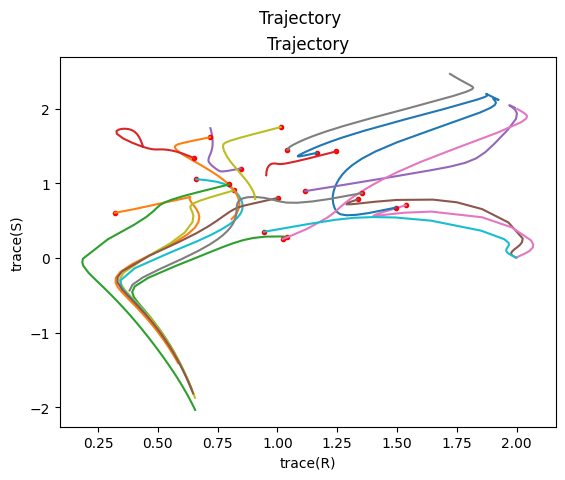

In [117]:
import matplotlib.pyplot as plt
from tqdm import tqdm
S0 = np.array([[0,1],[1,0]])
R0 = np.array([[np.cos(2*np.pi/3), -np.sin(2*np.pi/3)],
               [np.sin(2*np.pi/3), np.cos(2*np.pi/3)]])
fig, axs = plt.subplots(1)
fig.suptitle(f'Trajectory')

t_max=4
sample_size = 20
for _ in tqdm(range(sample_size), total = sample_size):
    P0 = np.random.rand((8))
   # print(P0)
    solution = solve_ivp(neg_grad, (0, t_max), P0)#, method='Radau')
    charR, charS = get_characters(solution.y)



    # plot initial step
    axs.plot(charR[0], charS[0], 'ro', label='Initial point', markersize=3)
   # axs.plot(1, 0, 'go', label='rho_k', markersize=2)

    axs.plot(charR, charS)

#for index, (cR, cS) in enumerate(zip(charR, charS)):
#    axs.plot(cR, cS, color=cmap(cmap_norm(solution.t[index])), lw=2)

axs.set_xlabel('trace(R)')
axs.set_ylabel('trace(S)')
#axs.legend()
axs.set_title('Trajectory')







In [101]:
# graf karakterjev
import numpy as np
from tqdm import tqdm
raise NotImplementedError
# get grid
resolution = 10
t_max = 1
min_param = -2
max_param = 2

x = np.linspace(-2, 2, resolution)
x, y = np.meshgrid(x, x, x, x, x, x, x, x)

grid = np.zeros((resolution, resolution, 1))

for index, (x0, y0) in tqdm(enumerate(zip(x.flatten(), y.flatten())) , total=resolution ** 2):
    solution = solve_ivp(neg_grad, (0, t_max), (x0, y0))

    grid[index // resolution][index % resolution] = np.degrees(np.arctan2(solution.y[1][-1], solution.y[0][-1]))


plt.figure(figsize=(16, 16))
# plot the grid
plt.imshow(grid, cmap='viridis', extent=(min_param, max_param, min_param, max_param), origin='lower')

plt.colorbar(label='Angle of the limit point (in degrees)')

# plot the unit circle
plt.plot(np.cos(np.linspace(0, 2 * np.pi, 100)), np.sin(np.linspace(0, 2 * np.pi, 100)), 'k--', color="red", label='Unit Circle')

plt.show()



    

NotImplementedError: 